# Planet X and its effect on the Solar System
The existence of Planet Nine has been hypothesized since 2014 based on the clustering of orbits of Kuiper Belt objects with orbital semi-major axes greater than 150AU. Could such a hypothetical planet cause the observed clustering of KBO perihelia near the ecliptic? This simulation investigates such a hypothesis using different models for Planet Nine, and will also attempt to investigate the effects that a Planet Nine would have on other Solar System objects.

We first import all necessary modules.

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

In this simulation, we avoid generating the outer Solar System.

In [2]:
sim = rebound.Simulation()
sim.add(m=1.)     # host star, 1 solar mass
#sim.add(m=9.550e-4, e=0.049, a=5.200, inc=0.023)    # Jupiter
#sim.add(m=2.858e-4, e=0.057, a=9.580, inc=0.044)    # Saturn
#sim.add(m=4.370e-5, e=0.046, a=19.20, inc=0.014)    # Uranus
#sim.add(m=5.150e-5, e=0.011, a=30.10, inc=0.031)    # Neptune

Now add 20 randomly generated Kuiper Belt objects to the diagram, all with semi-major axes $a > 150$ AU. Note that we avoid generating eccentricities greater than 0.8, so that all objects would have a perihelion greater than 30 AU.

In [3]:
sim.add(m=6.580e-9, e=0.244, a=39.20, inc=0.300)    # Pluto
sim.add(m=8.0e-9, e=0.442, a=67.67, inc=0.771)      # Eris

# Create 100 Kuiper belt objects, with 30AU < a < 50AU
n_kbo = 20
a = np.random.random(n_kbo)*10 + 40   # semimajor axis deviates from 450AU by up to 200AU
e = np.random.random(n_kbo)*0.05 + 0.1  # random eccentricities 0.05 < e < 0.15
inc = np.random.random(n_kbo)*np.pi/18. # orbital inclinations centered on +/-5 degrees=pi/36 radians, so let the range be 10 degrees
m = 1.97e-2*3.003e-6/n_kbo             # total mass of Kuiper belt is 1.97e-2 earth masses
r = 0

# generate the objects
for i in xrange(0,n_kbo):
    rand = np.random.random()*2*np.pi
    sim.add(m=m, r=r, a=a[i], e=e[i], inc=inc[i], Omega=0, omega=rand, f=rand)

In this simulation, we avoid adding in the Scattered Disc.

In [4]:
# Create random scattered disc objects, with 150AU < a < 550AU semimajor axis
#n_sdo = 100
#a = np.random.random(n_sdo)*200 + 350  # semimajor axis deviates from 450AU by up to 200AU
#e = np.random.random(n_sdo)*0.8        # random eccentricities 0 < e < 1
#inc = np.random.random(n_sdo)*2.*np.pi/9. # max inclination of 40 degrees = 2pi/9
#m = 0    # mass is negligible
#r = 0

# generate the objects
#for i in xrange(0,n_sdo):
#    rand = np.random.random()*2*np.pi
#    sim.add(m=m, r=r, a=a[i], e=e[i], inc=inc[i], Omega=0, omega=rand, f=rand)

Since this is the control setup, we avoid adding in Planet 9.

In [5]:
#sim.add(m=3.003e-5, e=0.6, a=700.0, inc=np.pi/9., omega=5.*np.pi/6.)    # Planet 9

We plot by calling the OrbitPlot function. We integrate our system ahead in time by 10 million years, or Nperiods = 1.0e7. Our timescale of interest is on the order of tens of millions of years.

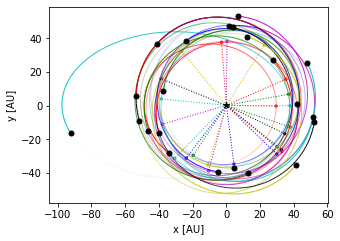

In [6]:
Nperiods = 1.0e7
sim.integrate(Nperiods*2.*np.pi)

fig, ax = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True)

To get an idea of the three dimensional distribution of orbits, we use the `slices` option. This will plot the orbits three times, from different perspectives. You can size of the `z` direction by changing the value of `slices`. For example, `slices=0.5` corresponds to plots half the size of the main plot.

/home/seriouscomedian/.local/lib/python3.6/site-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/home/seriouscomedian/.local/lib/python3.6/site-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


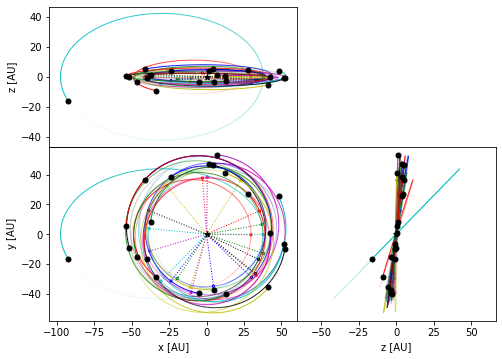

In [7]:
#xlim=[-2.,2],ylim=[-2.,2]
fig = rebound.OrbitPlot(sim,slices=0.8,unitlabel="[AU]", color=True, periastron=True)

The axes on the plots are automatically aligned with each other. The aspect of all plots is equal (a circular orbit will be a circle).

We observe the distribution of the Kuiper Belt objects' orbital properties after a certain number of orbital periods. In particular, we look for clustering of the $\omega$ values around a particular value, namely $180^\circ$ with respect to the $\omega$ value of Planet 9 in this simulation.

We create arrays of semimajor axis $a$, eccentricity $e$, inclination $i$, and perihelion argument $\omega$. We calculate the means and standard deviations of these quantities.

In [8]:
# Calculate orbits
orbits = sim.calculate_orbits()

# Declare arrays
a_vals = []
e_vals = []
i_vals = []
omega_vals = []

for orbit in orbits:
    #print(orbit)
    a_vals.append(orbit.a)
    e_vals.append(orbit.e)
    i_vals.append(orbit.e)
    omega_vals.append(orbit.omega)
    
# Convert angles i and omega to degrees
i_vals = 180./np.pi * np.array(i_vals)
omega_vals = 180./np.pi * np.array(omega_vals)

# Calculate the means and standard deviations
a_mean = np.mean(a_vals)
a_std = np.sqrt(np.var(a_vals))
e_mean = np.mean(e_vals)
e_std = np.sqrt(np.var(e_vals))
i_mean = np.mean(i_vals)
i_std = np.sqrt(np.var(i_vals))
omega_mean = np.mean(omega_vals)
omega_std = np.sqrt(np.var(omega_vals))

# Print the means and standard deviations
print("a = " + str(a_mean) + " +/- " + str(a_std) + " AU")
print("e = " + str(e_mean) + " +/- " + str(e_std))
print("i = " + str(i_mean) + " +/- " + str(i_std) + " degrees")
print("\u03C9 = " + str(omega_mean) + " +/- " + str(omega_std) + " degrees")


a = 46.17048246739728 +/- 5.582532592692668 AU
e = 0.14562383866296255 +/- 0.07074139750141964
i = 8.343631351881774 +/- 4.053183513688653 degrees
ω = -16.947176211131293 +/- 97.17200024413162 degrees


Now, we generate plots of $e$ vs $a$ and a histogram of $i$ values and another histogram of $\omega$ values.

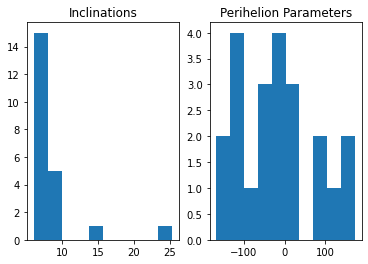

In [9]:
plt.subplot(121)
plt.title("Inclinations")
plt.hist(i_vals, bins=10)

plt.subplot(122)
plt.title("Perihelion Parameters")
plt.hist(omega_vals, bins=10)

plt.show()

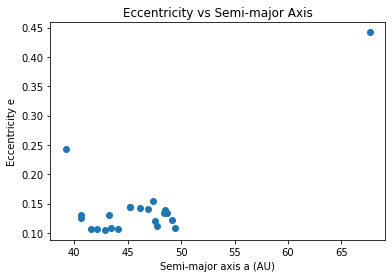

In [10]:
plt.title("Eccentricity vs Semi-major Axis")
plt.xlabel("Semi-major axis a (AU)")
plt.ylabel("Eccentricity e")
plt.scatter(a_vals, e_vals)
plt.show()